# Projeto - Base de Dados Covid

O objetivo do projeto será desenvolver um estudo no dataset `COVID.csv`, base esta que contém informações sobre casos de COVID. Ou seja a partir do diagnóstico de sintomas e informações dos pacientes deve-se desenvolver um modelo para prever casos confirmados de COVID'.

<br>

A descrição das variáveis contidas no dataset pode ser encontradas a seguir:

 - **id**: Identificação do paciente<br>
 - **sex**: Sexo do Paciente (0 - Homem / 1 - Mulher) <br>
 - **patient_type**: Se o paciente foi dispensado para casa (1) ou se foi internado (0) <br>
 - **intubed**: Seo paciente foi intubado ou não<br>
 - **pneumonia**: Se o paciente apresentou pneumonia ou não<br>
 - **age**: Idade do Paciente<br>
 - **pregnancy**: Se a paciente estava grávida ou não (para pacientes mulheres)<br>
 - **diabetes**: Se o paciente tem diabetes ou não<br>
 - **copd**: Se opaciente tem COPD ou não<br>
 - **asthma**: Se o paciente tem Asma ou não<br>
 - **inmsupr**: Se o paciente apresentou Imunosupressão ou não<br>
 - **hypertension**: Se o paciente tem hipertensão ou não<br>
 - **ohter_disease**: Se o paciente tem outras doenças ou não<br>
 - **cardiovascular**: Se o paciente tem doenças cardiácas ou não<br>
 - **obesity**: Se o paciente tem obesidade ou não<br>
 - **renal_chronic**: Se o paciente tem problemas renais ou não<br>
 - **tobacco**: Se o paciente é fumante ou não<br>
 - **contact_other_covid**: Se o paciente teve contato com outras pessoas diagnosticadas com covid<br>
 - **icu**: Se o paciente precisou ser internado na UTI<br>
 - **covid_res**: Se o resultado do teste foi Positivo ou Negativo<br>
 
Para ajudar no desenvolvimento do projeto, vamos separar o projeto em algumas seções, conforme descritas a seguir:

- __Preparação dos Dados e Verificação de Consistência__: Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de _outliers_ entre outras;

<br>

- __Análise Exploratória dos Dados__: Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto vocês desenvolveram an´laises e gráficos a respeito dos dados que estão utilizando. Tente tirar ao máximo informaç~eos sobre as variáveis em si e suas relações com as demais;

<br>

- __Modelagem dos Dados__: Nesta parte, vamos modelar um classificador para os resultados dos exames de COVID (`covid_res`). VocÊs deveram __treinar pelo menos 3 modelos__ (podendo testar mais que 3 também) e de acordo com alguma métrica de avaliação (escolhida por vocês), decidir qual será o melhor modelo a ser utilizado!;

<br>

- __Otimização do Modelo__: A partir do modelo escolhido no tópico anterior, vamos tentar aprimorar e garantir um melhor desempenho no modelo, seja fazendo validação cruzada, otimização de parâmetros com _GridSearchCV_ ou _RandomizedSearchCV_ e até mesmo testar diferentes _thresholds_ (ao invés de utilizar a função _predict_ do modelo, utilize a função _predict_proba_ do modelo e a partir das probabilidades determinar qual vai ser o limiar onde será considerado um caso positivo ou negativo);

<br>

- __Conclusões sobre o Projeto__: Para finalizar, descreva as suas conclusões sobre o desenvolvimento do modelo e os resultados obtidos.

## Critérios de Avaliação

Um processo de análise e modelagem de dados depende de diversos fatores, desde quais sementes aleatórias foram definadas até mesmo o desempenho computacional da máquina utlizada. Dessa forma, __não__ será cobrado que resultados os alunos obteram, mas sim o desenvolvimento do projeto, olhando os seguinte tópicos:

- Desenvolvimento mínimo de cada um dos itens acima;

- Padrozinação de Gráficos, Visualizações e códigos;

- _Clean Code_ e códigos comentados;

- Explicação de todos os processos feitos e decisões tomadas


<br>


## Informações Gerais sobre o Projeto

- O projeto poderá ser desenvolvido **individualmente**;

- Data de Divulgação do Projeto: 09/02/2022;

- Monitoria do Projeto 1: 18/02/2022;

- Data de Entrega: 23/02/2022;

- Entrega: Através do _Class_, será criado um Projeto para a entrega dentro do módulo "_Machine Learning_", Aula "Árvore de Decisão" na aba Exercícios;

<br>

__Padrão de Entrega__ Para a identificação dos alunos que entregaram o projeto, peço para que sigam o padrão de nome para o arquivo enviado conforme as orientações abaixo:

- NúmeroDaTurma_Projeto1_NomeDoALuno.ipynb;

__Bem Importante:__ Deixem devidamente identificado o número da turma e o nome do aluno dentro do Notebook também.

In [1]:
# Importando bibliotecas necessárias para o desenvolvimento do projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from mlxtend.plotting import plot_confusion_matrix

In [2]:
# Desativando "warnings" temporariamente para: execução do modelo 'XGBoost' e execução do algoritmo de 'looping' relacionado ao 'threshold' (não exibir mensagem
# de alerta para valores muitas casas decimais ou outros alertas do tipo)
warnings.filterwarnings('ignore')

In [3]:
# Criando 'DataFrame' com o conjunto de dados 'COVID.csv'
df = pd.read_csv('COVID.csv')
df.head()

,Unnamed: 0,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,0,1,NaN,0.0,27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
1,1,0,1,NaN,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN
2,2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1,0.0
3,3,0,0,0.0,1.0,30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0.0
4,4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1,0.0


## Preparação dos Dados e Verificação de Consistência nos mesmos

In [4]:
# Visualizando as informações do 'DataFrame'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499692 entries, 0 to 499691
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           499692 non-null  int64  
 1   sex                  499692 non-null  int64  
 2   patient_type         499692 non-null  int64  
 3   intubed              107424 non-null  float64
 4   pneumonia            499681 non-null  float64
 5   age                  499692 non-null  int64  
 6   pregnancy            245258 non-null  float64
 7   diabetes             498051 non-null  float64
 8   copd                 498246 non-null  float64
 9   asthma               498250 non-null  float64
 10  inmsupr              498030 non-null  float64
 11  hypertension         498203 non-null  float64
 12  other_disease        497499 non-null  float64
 13  cardiovascular       498183 non-null  float64
 14  obesity              498222 non-null  float64
 15  renal_chronic    

In [5]:
# Verificando se o "dataset" possui dados faltantes
df.isnull().sum()

Unnamed: 0                  0
sex                         0
patient_type                0
intubed                392268
pneumonia                  11
age                         0
pregnancy              254434
diabetes                 1641
copd                     1446
asthma                   1442
inmsupr                  1662
hypertension             1489
other_disease            2193
cardiovascular           1509
obesity                  1470
renal_chronic            1476
tobacco                  1579
contact_other_covid    153675
covid_res                   0
icu                    392269
dtype: int64

In [6]:
# Verificando as frequências em relação à gravidez (desconsiderando os dados faltantes)
df['pregnancy'].value_counts(normalize=True)

0.0    0.985264
1.0    0.014736
Name: pregnancy, dtype: float64

In [7]:
# Verificando o percentual de dados faltantes da 'feature' referente à gravidez (somente em relação aos registros do sexo feminino)
df.loc[ (df['sex'] == 1)]['pregnancy'].isnull().sum() / df['pregnancy'].isnull().count()

0.002673646966531383

In [8]:
# Verificando o percentual de dados faltantes da 'feature' referente ao contato com outras pessoas contaminadas
df['contact_other_covid'].isnull().sum() / df['contact_other_covid'].isnull().count()

0.30753944429768737

In [9]:
## Verificação dos percentuais de dados faltantes das demais features ##

# Variável com a lista das demais 'features' com dados faltantes
features = ['pneumonia', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco']

# 'Loop' para verificar os percentu...... cada 'feature'
for feature in features:
    print(f'{feature}: {round(df[feature].isnull().sum() / df[feature].isnull().count() * 100, 4)}%')
    print('-' * 40)

pneumonia: 0.0022%
----------------------------------------
diabetes: 0.3284%
----------------------------------------
copd: 0.2894%
----------------------------------------
asthma: 0.2886%
----------------------------------------
inmsupr: 0.3326%
----------------------------------------
hypertension: 0.298%
----------------------------------------
other_disease: 0.4389%
----------------------------------------
cardiovascular: 0.302%
----------------------------------------
obesity: 0.2942%
----------------------------------------
renal_chronic: 0.2954%
----------------------------------------
tobacco: 0.316%
----------------------------------------


**Motivações referentes às alterações no 'DataFrame' em relação à "Features" com dados faltantes:**
- **"intubed" e "icu"**: serão removidas, porque além de possuirem muitos dados faltantes, não serão úteis para um modelo que realizará previsões de casos confirmados de COVID;  

- **"pregnancy"**: será preenchida com a moda (zero), tanto para o sexo masculino como para os demais registros do sexo feminino, pois a quantidade de pacientes do sexo feminino com valor nulo representa um percentual muito pequeno em comparação com o total de registros na base de dados, também a grande maioria delas com valor não-nulo (cerca de 98%) possuem valor referente a moda da "feature" e assim ocasionará pouco ou nenhum enviesamento nos futuros modelos;  

- **"contact_other_covid"**: será removida por possuir muitos dados faltantes em relação à quantidade de registros no "Dataset" e não possui uma referência de como preenchê-los. Neste caso, devido à essa maior quantidade de faltantes (cerca de 30%), preencher com qualquer valor resultará em um enviesamento nos futuros modelos;  

- **Demais "features"**: serão preenchidas com as suas respectivas modas, pois assim como no caso da "feature" referente à gravidez, as quantidades de dados faltantes representam um percentual muito pequeno em relação à quantidade de registros na base de dados.

In [10]:
# Removendo 'features' do 'DataFrame'
df.drop(columns=['intubed', 'contact_other_covid', 'icu'], inplace=True)

In [11]:
## Preenchendo os dados faltantes das "features" ##

# Variável com a lista das demais 'features'
features = ['pregnancy', 'pneumonia', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco']

# 'Loop' para preencher os dados faltantes com a moda de cada 'feature'
for feature in features:
    df[feature].fillna(df[feature].mode()[0], inplace=True)

In [12]:
# Verificando novamente se o "dataset" ainda possui dados faltantes
df.isnull().sum()

Unnamed: 0        0
sex               0
patient_type      0
pneumonia         0
age               0
pregnancy         0
diabetes          0
copd              0
asthma            0
inmsupr           0
hypertension      0
other_disease     0
cardiovascular    0
obesity           0
renal_chronic     0
tobacco           0
covid_res         0
dtype: int64

In [13]:
# Pesquisando possíveis dados duplicados
df.loc[ df.duplicated() ]

,Unnamed: 0,sex,patient_type,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res


In [14]:
# Pesquisando novamente sem o "id" dos pacientes (feature 'Unnamed: 0')
df.drop(columns='Unnamed: 0').loc[ df.drop(columns='Unnamed: 0').duplicated() ]

,sex,patient_type,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res
22,1,1,0.0,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
25,0,1,0.0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
27,0,1,0.0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
58,0,1,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
62,0,1,0.0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499686,1,1,0.0,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
499688,0,0,1.0,63,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
499689,1,1,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
499690,1,1,0.0,45,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


**OBS**: no caso desse conjunto de dados, devido a grande quantidade de duplicados, podemos concluir que realmente os registros pertencem a pacientes diferentes que coincidem nos sintomas, idade e/ou outros atributos. Essa conclusão é reforçada pelo fato de cada paciente possuir o seu próprio "id" ('Unnamed: 0').

In [15]:
# Visualizando novamente as informações do 'DataFrame'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499692 entries, 0 to 499691
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      499692 non-null  int64  
 1   sex             499692 non-null  int64  
 2   patient_type    499692 non-null  int64  
 3   pneumonia       499692 non-null  float64
 4   age             499692 non-null  int64  
 5   pregnancy       499692 non-null  float64
 6   diabetes        499692 non-null  float64
 7   copd            499692 non-null  float64
 8   asthma          499692 non-null  float64
 9   inmsupr         499692 non-null  float64
 10  hypertension    499692 non-null  float64
 11  other_disease   499692 non-null  float64
 12  cardiovascular  499692 non-null  float64
 13  obesity         499692 non-null  float64
 14  renal_chronic   499692 non-null  float64
 15  tobacco         499692 non-null  float64
 16  covid_res       499692 non-null  int64  
dtypes: float64

**OBS**: todas as "features" possuem seu tipo de dado numérico (int ou float), não existindo a necessidade de tratar algum tipo de dado.

In [16]:
# Visualizando as métricas do 'DataFrame' para verificação de consistência dos dados
df.describe()

,Unnamed: 0,sex,patient_type,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res
count,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000
mean,249845.500000,0.493492,0.784775,0.157529,42.545942,0.007232,0.124775,0.016562,0.032448,0.016152,0.162780,0.030803,0.022852,0.163959,0.020050,0.085963,0.441586
std,144248.799693,0.499958,0.410978,0.364299,16.640391,0.084736,0.330464,0.127624,0.177187,0.126060,0.369165,0.172784,0.149432,0.370239,0.140173,0.280310,0.496577
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124922.750000,0.000000,1.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,249845.500000,0.000000,1.000000,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,374768.250000,1.000000,1.000000,0.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,499691.000000,1.000000,1.000000,1.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**OBS**: com excessão das "features" 'Unnamed:0' e 'age', todas as demais proporcionam apenas a validação de que os dados estão consistentes, ou seja, resultados binários entre 0 e 1 sem apresentar valores maiores ou negativos. Em relação à idade (age), além da consistência dos dados (não existem dados com valores menores que 0 ou maiores que 100/120), também é possível observar que a média e a mediana estão próximas, proporcionando uma distribuição normal em relação aos valores dos dados (essa consideração poderá ser melhor observada na visualização gráfica com o "Histograma" que será gerado mais à frente neste projeto).

---

## EDA - Análise Exploratória dos Dados

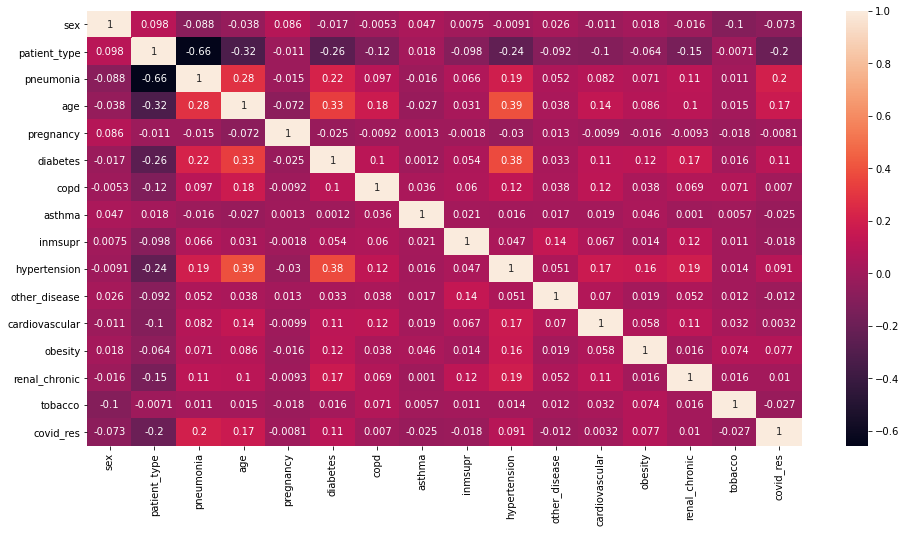

In [17]:
# Criando mapa de calor para visualizar e buscar informações e correlações a respeito dos dados
plt.figure(figsize=(16, 8))
sns.heatmap(df.drop(columns='Unnamed: 0').corr(), annot=True)
plt.show()

- Verificando no mapa de calor, podemos observar que as correlações das "features" com a "target" são baixas. Entre as "features" também não existem muitas correlações, dificultando num primeiro momento escolher os melhores atributos para futuros modelos. Para isso, será necessário buscar de outras formas as "features" mais indicadas.

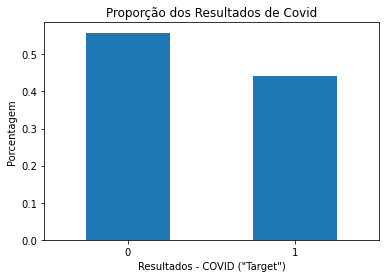

In [18]:
# Criando gráfico de barras para exibir proporcão das frequências referente aos resultados dos exames de COVID ('target')
df['covid_res'].value_counts(normalize=True).plot(kind='bar', title='Proporção dos Resultados de Covid', xlabel='Resultados - COVID ("Target")', ylabel='Porcentagem', rot=0)
plt.show()

- Os dados relacionados aos testes de Covid estão em uma proporção equilibrada, ou seja, as quantidades de resultados positivos e negativos estão balanceadas, sendo que um pouco mais de 50% deles apresentaram resultado negativo.

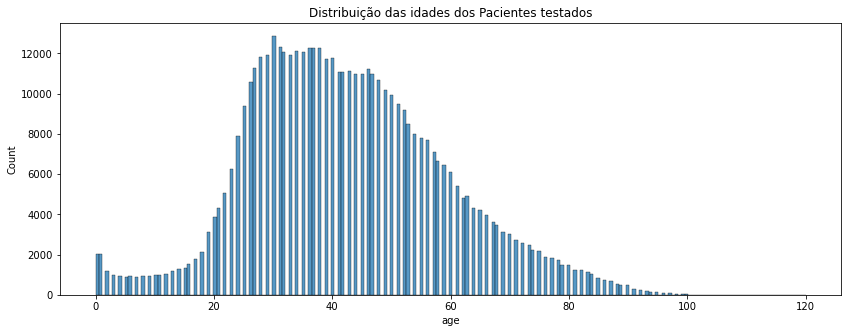

In [19]:
# Criando gráfico histograma para visualização da distribuição dos dados referentes às idades dos pacientes
plt.figure(figsize=(14, 5))
sns.histplot(df['age'])
plt.title('Distribuição das idades dos Pacientes testados')
plt.show()

- Reforçando a informação disponibilizada anteriormente, é possível enxergar uma distribuição normal nos valores das idades dos pacientes. Observando este gráfico, nota-se que a maioria dos pacientes que foram testados tinham idade entre 20 e 60 anos.

0    253098
1    246594
Name: sex, dtype: int64


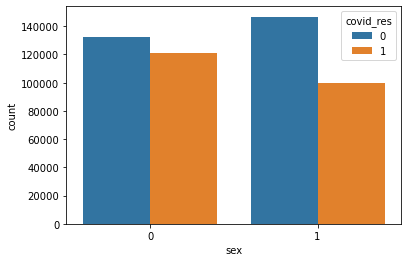

----------------------------------------------------------------------
1    392146
0    107546
Name: patient_type, dtype: int64


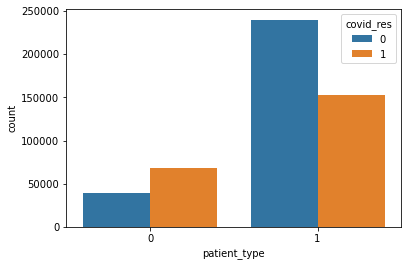

----------------------------------------------------------------------
0.0    420976
1.0     78716
Name: pneumonia, dtype: int64


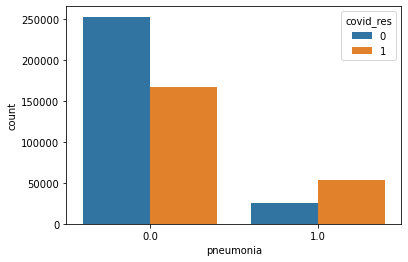

----------------------------------------------------------------------
0.0    496078
1.0      3614
Name: pregnancy, dtype: int64


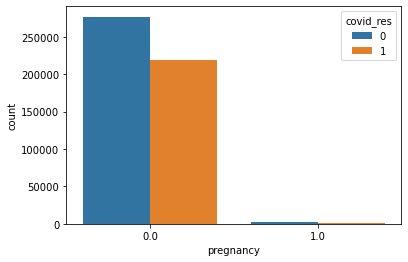

----------------------------------------------------------------------
0.0    437343
1.0     62349
Name: diabetes, dtype: int64


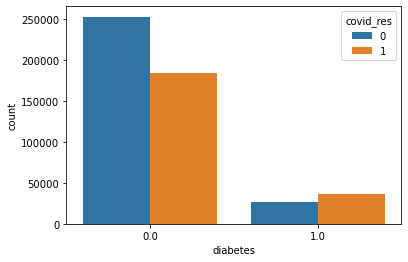

----------------------------------------------------------------------
0.0    491416
1.0      8276
Name: copd, dtype: int64


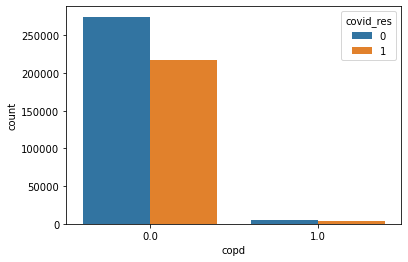

----------------------------------------------------------------------
0.0    483478
1.0     16214
Name: asthma, dtype: int64


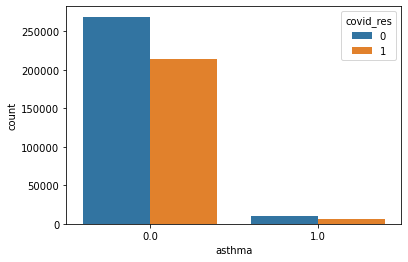

----------------------------------------------------------------------
0.0    491621
1.0      8071
Name: inmsupr, dtype: int64


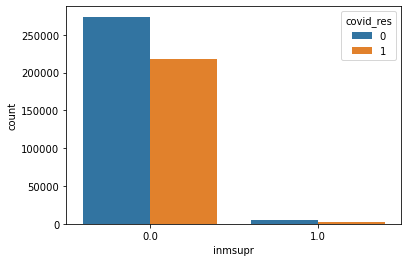

----------------------------------------------------------------------
0.0    418352
1.0     81340
Name: hypertension, dtype: int64


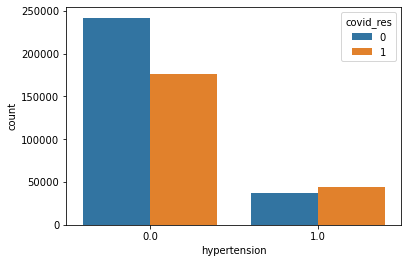

----------------------------------------------------------------------
0.0    484300
1.0     15392
Name: other_disease, dtype: int64


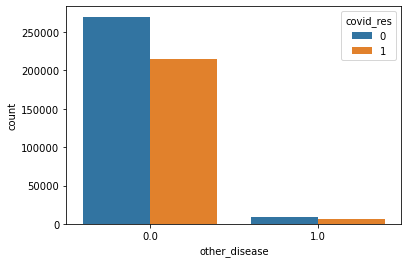

----------------------------------------------------------------------
0.0    488273
1.0     11419
Name: cardiovascular, dtype: int64


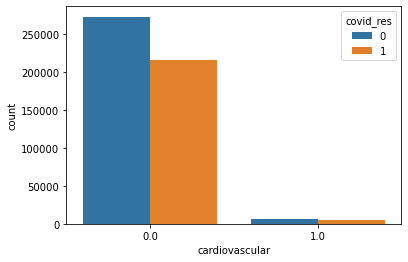

----------------------------------------------------------------------
0.0    417763
1.0     81929
Name: obesity, dtype: int64


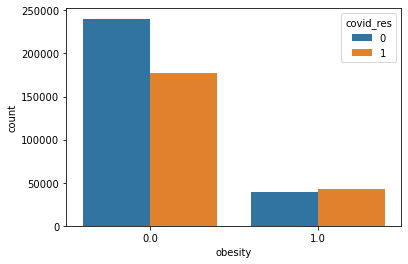

----------------------------------------------------------------------
0.0    489673
1.0     10019
Name: renal_chronic, dtype: int64


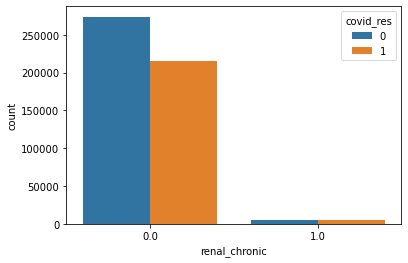

----------------------------------------------------------------------
0.0    456737
1.0     42955
Name: tobacco, dtype: int64


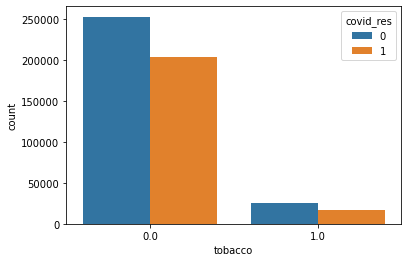

----------------------------------------------------------------------


In [20]:
# Criando gráficos de barras 'countplot' e analisando a 'target' com as 'features' referentes ao sexo, internação e os sintomas/doenças do paciente
features = ['sex', 'patient_type', 'pneumonia', 'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension', 
            'other_disease', 'cardiovascular', 'obesity', 'renal_chronic','tobacco']

# 'Loop' para gerar gráficos de barras 'countplot' relacionados aos resultados dos testes de Covid
for feature in features:
    print(df[feature].value_counts()) # Exibindo valores referentes à "feature"
    sns.countplot(x=df[feature], hue=df['covid_res'])
    plt.show()
    print('-' * 70)

#### Considerações sobre os gráficos relacionando as "features" à "target"

- **sex**: as quantidades de testes entre os sexos aconteceu de forma balanceada, assim como os resultados dos testes de Covid para ambos. Sendo que o sexo masculino retornou um pouco mais de resultados positivos que o feminino, ou seja, na população relacionada ao conjunto de dados, foram registrados mais casos em pacientes do sexo masculino, tanto em valor absoluto como em percentual (aproximadamente 47,50% contra 40,50% entre as do sexo feminino);  

- **patient_type**: entre os pacientes que foram dispensadas ou ficaram internadas, a quantidade de testes foi muito superior daquelas que foram dispensadas da internação, consequentemente a maioria dos testes com resultados positivos ocorreram nesse grupo. Ainda sobre o grupo de pacientes dispensados, a maioria apresentou resultado negativo para Covid. Já aqueles que precisaram ser internados, podemos observar o inverso, onde a maioria delas obtiveram resultado positivo para Covid; 

- **pneumonia, diabetes, hypertension, obesity**: a proporção referente à quantidade de testes e resultados de Covid é análoga à "feature patient_type". Entre os pacientes testados com alguma dessas doenças ou obesidade, a maioria delas obtiveram resultados positivos, por outro lado, a maioria deles testados sem a doença obtiveram resultados negativos.  

- **pregnancy, copd, asthma, inmsupr, other_disease, cardiovascular, obesity, renal_chronic**: a quantidade de pacientes grávidas ou com alguma das doenças referentes as essas "features" é muito baixa para a realização de uma análise em relação a quantidade de resultados positivos e negativos para os testes;  

- **tobacco**: entre os pacientes fumantes ou não-fumantes, os resultados de testes negativos foram maiores para ambos os casos, tanto em quantidades absolutas como em percentuais.

 Quantidade de pacientes com resultados Positivos ou Negativos por idade:


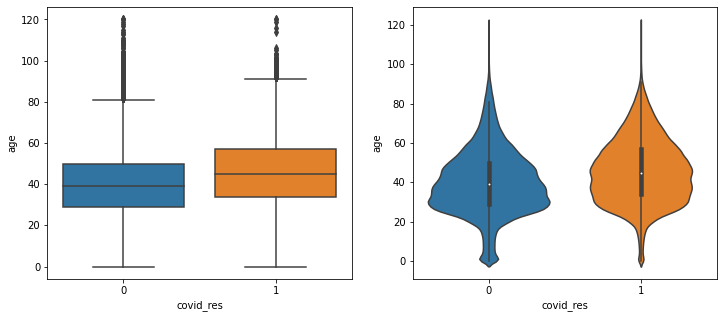

In [21]:
# Criando gráficos 'violino' e 'boxplot' para visualizar a distribuição dos pacientes por idade, à partir dos resultados referentes aos testes de Covid
print('\033[1m Quantidade de pacientes com resultados Positivos ou Negativos por idade:')

# Criando área de plotagem
figure, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotando os gráficos
sns.boxplot(data=df, x='covid_res', y='age', ax=axes[0])
sns.violinplot(data=df, x='covid_res', y='age', ax=axes[1])
plt.show()

- No primeiro gráfico ("boxplot"), nota-se que a maoria dos pacientes com resultado negativo para Covid estão dentro de um intervalo de idade menor que aquelas que apresentaram resultado positivo (negativos: mais ou menos entre 30 e 50 anos, positivos: mais ou menos entre 35 e 60 anos). Enquanto no segundo gráfico (violino), é mais visível a distribuição dos resultados em todas as faixas de idade, mais uma vez destacando as faixas de idade com mais pacientes para cada tipo de resultado. Percebe-se também com essas demonstrações gráficas que, à partir dos 40 anos, a quantidade de resultados negativos e positivos começam a ser mais equilibradas e conforme a idade aumenta, a quantidade de resultados positivos começa a superar a de negativos.

Positivos x Negativos por idade  (1ª Coluna: 40 à 49 | 2ª Coluna: 50 à 59 | 3ª Coluna: 60 à 69)


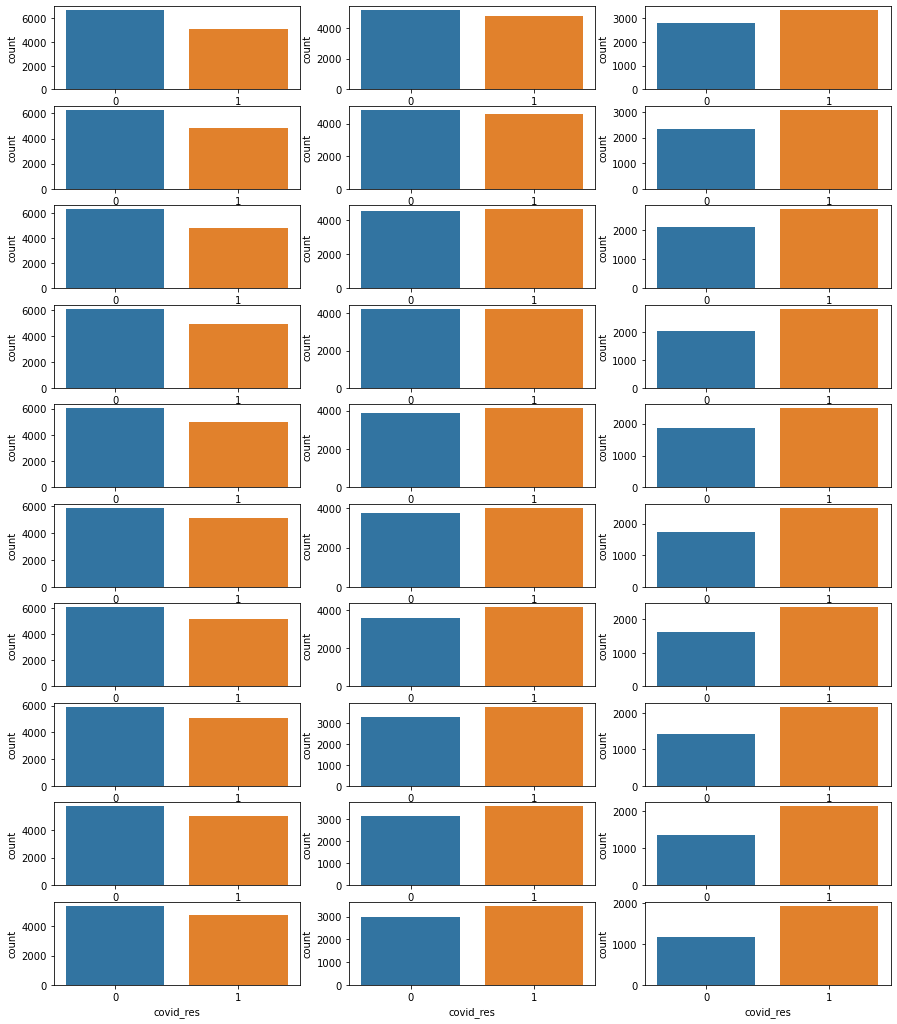

In [22]:
## Criando gráficos de barras 'countplot' e analisando cada idade ("age") com a 'target' ##

# Criando variáveis para armazenar idade inicial do 'loop' e criar área de plotagem
idade = 40
figure, axes = plt.subplots(10, 3, figsize=(15, 18))

# 'Loop' para plotar os gráficos
for i in range(0, 3): # Quantidade de colunas
    for j in range(0, 10): # Quantidade de linhas
        # Filtro dos registros por idade a cada 'loop'
        df_idade = df.loc[ df['age'] == idade ]
        sns.countplot(x=df_idade['covid_res'], ax=axes[j][i])
        idade += 1

print('Positivos x Negativos por idade ' '\033[1m (1ª Coluna: 40 à 49 | 2ª Coluna: 50 à 59 | 3ª Coluna: 60 à 69)')
plt.show()

- Os gráficos acima representam as contagens de testes negativos e positivos de Covid, entre 40 e 69 anos. Observando os mesmos, confirma-se as informaçoes fornecidas pelos gráficos "boxplot" e violino (a quantidade de resultados positivos superando os negativos conforme o aumento da idade dos pacientes).

---

## Modelagem dos Dados

Para efetuar uma melhor predição para os casos de COVID, com base no conjunto de dados fornecido, foram selecionados e avaliados alguns modelos. Destes, serão escolhidos dois, seguindo os critérios abaixo:  

*1) O que apresentar melhor resultado em relação à pontuação ROC-AUC*  

*2) O que apresentar melhor resultado em relação à pontuação "F1-Score"*  

Seguem os modelos que serão avaliados:  
- XGBoost
- Regressão Logística
- GradientBoost
- Random Forest
- AdaBoost
- LightGBM
- Naive-Bayes

**OBS**: na escolha inicial dos modelos para verificação de suas métricas, havia também o KNN, mas devido ao lento desempenho para esse "dataset" no equipamento que foi desenvolvido este projeto e resultados métricos inferiores aos demais, observado posteriormente, foi decidido fazer a remoção do mesmo da lista de modelos do projeto. 

In [23]:
## Criando variáveis para serem utilizadas nos modelos ##

# Criando variáveis 'X' e 'y'
X = df.drop(columns=['Unnamed: 0', 'covid_res'])
y = df['covid_res']

# Separando os dados nas variáveis de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14, stratify=y)

# Instanciando classe para normalização dos dados
scaler = StandardScaler()

# Transformando os dados das variáveis "X" com a normalização
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Criando lista de modelos (dicionários) escolhidos para o desenvolvimento do projeto
random_seed = 14
lista_modelos = [
    {'nome_modelo': 'XGBoost', 'modelo': XGBClassifier(random_state=random_seed)},
    {'nome_modelo': 'Regressão Logística', 'modelo': LogisticRegression(random_state=random_seed)},
    {'nome_modelo': 'GradientBoost', 'modelo': GradientBoostingClassifier(random_state=random_seed)},
    {'nome_modelo': 'Random Forest', 'modelo': RandomForestClassifier(random_state=random_seed)},
    {'nome_modelo': 'AdaBoost', 'modelo': AdaBoostClassifier(random_state=random_seed)},
    {'nome_modelo': 'LightGBM', 'modelo': LGBMClassifier(random_state=random_seed)},
    {'nome_modelo': 'Naive-Bayes', 'modelo': GaussianNB()}
]

In [24]:
# Criando função para testar os modelos e visualizar seus resultados (métricas e gráfico)
def testa_modelo_plota_ROC_AUC(lista_modelos, col_nome_modelo, col_modelo, X_train, X_test, y_train, y_test):
    '''Recebe uma lista com os nomes e instâncias dos modelos (lista_modelos), duas "strings": 1ª) os nomes das colunas referentes ao nome do modelo (col_nome_modelo) \
e ao próprio modelo em si (col_modelo). Recebe também as variáveis de treino e teste com os dados para a execução dos modelos relacionados na lista. Retorna a exibição \
das métricas: acurária, precisão, "recall", "f1-score" e "ROC-AUC" dos modelos e o gráfico da curva ROC-AUC dos mesmos.'''
    
    # 'Loop' para instanciar, treinar e realizar predições de cada modelo da lista
    for mod in lista_modelos:
        modelo = mod[col_modelo]
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        
        # Criando variáveis com os valores da curva 'ROC' e 'AUC' para plotar o gráfico (fpr = false positive rates, tpr = true positive rates)
        fpr, tpr, thresholds = roc_curve(y_test, modelo.predict_proba(X_test)[:,1])
        auc = roc_auc_score(y_test, modelo.predict(X_test))
        
        # Plotando linhas da curva ROC-AUC referentes à cada modelo
        plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (mod[col_nome_modelo], auc))
        
        # Exibindo "scores" dos modelos
        print('Modelo      : %s' % mod[col_nome_modelo])
        print('Acurácia    : %0.4f ' % accuracy_score(y_test, y_pred))
        print('Precisão    : %0.4f ' % precision_score(y_test, y_pred))
        print('"Recall"    : %0.4f ' % recall_score(y_test, y_pred))
        print('"F1 - Score": %0.4f ' % f1_score(y_test, y_pred))
        print('ROC - AUC   : %0.4f ' % auc)
        print('-' * 70)
    
    # Plotando gráfico de linhas curva 'ROC-AUC'
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC curve')
    plt.legend(loc="lower right")
    plt.show()

[17:08:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Modelo      : XGBoost
Acurácia    : 0.6347 
Precisão    : 0.6643 
"Recall"    : 0.3494 
"F1 - Score": 0.4579 
ROC - AUC   : 0.6049 
----------------------------------------------------------------------
Modelo      : Regressão Logística
Acurácia    : 0.6317 
Precisão    : 0.6483 
"Recall"    : 0.3631 
"F1 - Score": 0.4655 
ROC - AUC   : 0.6036 
----------------------------------------------------------------------
Modelo      : GradientBoost
Acurácia    : 0.6357 
Precisão    : 0.6700 
"Recall"    : 0.3450 
"F1 - Score": 0.4554 
ROC - AUC   : 0.6053 
----------------------------------------------------------------------
Modelo      : Random Forest
Acurácia    : 0.6260 
Precisão    :

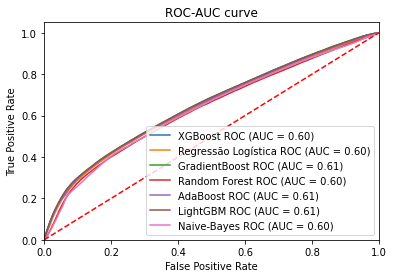

In [25]:
# Executando a função 'testa_modelo_plota_ROC_AUC' para avaliar o melhor modelo dentre os escolhidos
testa_modelo_plota_ROC_AUC(lista_modelos, 'nome_modelo', 'modelo', X_train_norm, X_test_norm, y_train, y_test)

---

## Otimização dos Modelos

Conforme critérios definidos anteriormente, os modelos escolhidos foram:
- LightGBM: melhor pontuação "ROC-AUC" = 0,6061
- Naive-Bayes: melhor pontuação "F1-Score" = 0,5040  

A próxima etapa consiste na aplicação de técnicas de otimização para os modelos escolhidos, com o objetivo de selecionar o melhor deles, com base em seus resultados após as otimizações. O modelo selecionado será considerado como o modelo mais indicado dentre os modelos apresentados no projeto.

#### Modelo LightGBM

In [26]:
# Instanciando o modelo 'LightGBM'
modelo = LGBMClassifier(random_state=random_seed)

In [27]:
# Verificando parâmetros disponíveis para aplicar otimização
pprint(modelo.get_params())

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 14,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}


In [28]:
# Criando variáveis referentes aos hiperparâmetros selecionados para otimização
learning_rate = [round(x, 2) for x in np.linspace(0.1, 0.5, 9)]
max_depth = [int(x) for x in np.linspace(-1, 7, 9)]
n_estimators = [int(x) for x in np.linspace(100, 1000, 10)]

# Armazenando variáveis em um dicionário
parametros_dic = {'learning_rate': learning_rate,
                  'max_depth': max_depth,
                  'n_estimators': n_estimators    
}

# Instanciando a classe 'RandomizedSearchCV' para pesquisar as configurações de parâmetros mais indicadas para melhoria do modelo
param_aleatorios = RandomizedSearchCV(estimator=modelo, param_distributions=parametros_dic, n_iter=100, n_jobs=-1, cv=3, verbose=2)

In [39]:
%%time
# Aplicando treino na instância da classe com os dados de treino do "dataset" para obter os valores de parâmetros mais indicados para o modelo
param_aleatorios.fit(X_train_norm, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Wall time: 30min 58s


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=14), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.15, 0.2, 0.25,
                                                          0.3, 0.35, 0.4, 0.45,
                                                          0.5],
                                        'max_depth': [-1, 0, 1, 2, 3, 4, 5, 6,
                                                      7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   verbose=2)

In [89]:
# Verificando se o modelo está propenso à 'underfitting' ou 'overfitting'
print(param_aleatorios.cv_results_['mean_test_score'], '\n')
print('Média das pontuações de "mean_test_score" do "cross-validation":', param_aleatorios.cv_results_['mean_test_score'].mean())
print('De acordo com os resultados, o modelo está aprendendo quando recebe novos dados, sem propensões para "underfitting" ou "overfitting".')

[0.63361961 0.62925406 0.63241315 0.63494614 0.63393695 0.63376541
 0.63460307 0.6331336  0.62946848 0.63421712 0.63449444 0.63243888
 0.63072354 0.63428288 0.63329941 0.63516056 0.63241315 0.63301638
 0.62803331 0.62765021 0.63512339 0.63378257 0.63086362 0.63355957
 0.63237599 0.62810478 0.63306212 0.63061776 0.63382831 0.6327648
 0.63267903 0.63057202 0.63462594 0.6300374  0.6275673  0.63266759
 0.63174417 0.63452302 0.63349954 0.63313074 0.63006599 0.63182421
 0.63481749 0.63478604 0.62928837 0.62974293 0.63397126 0.63376827
 0.62989446 0.63240458 0.63164696 0.63304211 0.63427144 0.62700124
 0.6279847  0.63360531 0.63117525 0.63288773 0.63476317 0.6335367
 0.63375112 0.63351955 0.63148687 0.63355099 0.63482607 0.63483464
 0.632639   0.63478604 0.62861367 0.63472887 0.62959713 0.63452017
 0.63440295 0.63439723 0.6330078  0.62802759 0.63365392 0.63369108
 0.6324446  0.63166698 0.63217872 0.63504334 0.62810478 0.62977724
 0.62987158 0.62852504 0.63256181 0.63042335 0.63477461 0.633122

In [40]:
# Visualizando os melhores parâmetros
param_aleatorios.best_params_

{'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1}

In [29]:
# Instanciando novamente o modelo, dessa vez com os melhores parâmetros
mod_param_otim = LGBMClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=random_seed)

# Treinando o modelo
mod_param_otim.fit(X_train_norm, y_train)

# Realizando novamente as predições com o modelo, após o treino com os melhores parâmetros
y_pred = mod_param_otim.predict(X_test_norm)

In [30]:
# Exibindo métricas obtidas pelo modelo após as predições
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.86      0.73     83711
           1       0.67      0.35      0.46     66197

    accuracy                           0.64    149908
   macro avg       0.65      0.61      0.59    149908
weighted avg       0.64      0.64      0.61    149908



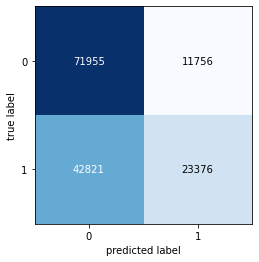

In [31]:
# Plotando 'Matriz de Confusão' referente aos resultados obtidos pelo modelo 
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm)
plt.show()

- Com os valores de hiperparâmetros indicados pela técnica de otimização "RandomizedSearchCV", o resultado de "recall" das predições para testes positivos de Covid continua insatisfatório, pensando em um "dataset" que está armazenando testes relacionados a um determinado tipo de doença (abaixo de 50%). Visando uma melhoria nesse resultado, ou seja, aumentar os falsos positivos, será aplicado o ajuste no valor de "threshold" no modelo.

In [32]:
## Alteração do valor de 'threshold' no modelo ##

# Criando Série com as probabilidas previstas pelo modelo
y_proba_test = mod_param_otim.predict_proba(X_test_norm)

# Criando 'DataFrame' com os resultados reais e suas probabilidades preditas pelo modelo (threshold)
results_test = pd.DataFrame(y_test)
results_test['proba'] = np.round(y_proba_test[:,1], 3) # Pegando a probabilidade em estar com COVID (classe 1)
results_test.rename(columns={'covid_res': 'target'}, inplace = True)
results_test.head()

,target,proba
454891,0,0.434
76997,1,0.424
58826,1,0.433
353394,0,0.355
284045,0,0.350


In [35]:
# Criando variáveis que serão utilizadas como parâmetros no 'looping' referente aos resultados do modelo em cada 'threshold'
threshold_increment  = 0.02
threshold_begin = threshold_increment
threshold_end    = 1.0

# Criando listas para armazenar os resultados em cada 'looping', calculando TN, FN, FP, TP e outras métricas
lista_threshold  = []
lista_TN         = []
lista_FN         = []
lista_FP         = []
lista_TP         = []
lista_precision  = []
lista_recall     = []
lista_accuracy   = []
lista_f1score   = []

# 'Looping' para calcular e armazenar os resultados do modelo com cada valor de 'threshold' (incrementando a medida de 'threshold' em 0.2 a cada 'looping')
for i in np.arange(threshold_begin, threshold_end + threshold_increment, threshold_increment):
    i_threshold = np.round(i, 2)
    
    # Criando colunas de 'threshold' e 'flag' referente aos resultados dos testes, conforme percentual de 'threshold'
    results_test['y_pred'] = results_test['proba'].apply(lambda x: 1 if x >= i_threshold else 0)
    results_test['flag_TN'] = np.where((results_test['y_pred'] == 0) & (results_test['target'] == 0), 1, 0)
    results_test['flag_FN'] = np.where((results_test['y_pred'] == 0) & (results_test['target'] == 1), 1, 0)
    results_test['flag_TP'] = np.where((results_test['y_pred'] == 1) & (results_test['target'] == 1), 1, 0)
    results_test['flag_FP'] = np.where((results_test['y_pred'] == 1) & (results_test['target'] == 0), 1, 0)
    
    # Criando variáveis referente à soma dos resultados classificatórios para calcular as métricas
    TN = results_test['flag_TN'].sum()
    FN = results_test['flag_FN'].sum()
    TP = results_test['flag_TP'].sum()
    FP = results_test['flag_FP'].sum()
    
    # Realizando os cálculos das métricas
    precision = np.where((TP + FP) > 0, TP / (TP + FP), 0)
    recall = np.where((TP + FN) > 0, TP / (TP + FN), 0)
    accuracy = np.where((TN + FN + TP + FP) > 0, 
                         (TP + TN)/(TN + FN + TP + FP), 0)
    f1score = np.where((precision + recall) > 0, (2 * precision * recall)/(precision + recall), 0)
    
    # Armazenando resultados nas listas
    lista_threshold.append(i_threshold)
    lista_TN.append(TN)
    lista_FN.append(FN)
    lista_FP.append(FP)
    lista_TP.append(TP)
    lista_precision.append(np.round(precision, 4))
    lista_recall.append(np.round(recall, 4))
    lista_accuracy.append(np.round(accuracy, 4))
    lista_f1score.append(np.round(f1score, 4))

#---------------------------------------------------------------------------------------------------------------------------------
# Criando dicionário com os resultados finais das métricas de cada 'threshold'
dict_output = {
  "threshold" : lista_threshold, 
  "TN" : lista_TN,
  "FN" : lista_FN,
  "FP" : lista_FP,
  "TP" : lista_TP,
  "precision" : lista_precision,
  "recall" : lista_recall,
  "accuracy" : lista_accuracy,
  "f1_score" : lista_f1score
}

# Criando 'DataFrame' à partir do dicionário com os resultados finais
df_results = pd.DataFrame(dict_output)

In [36]:
# Exibindo os resultados dos valores de 'threshold'
df_results

,threshold,TN,FN,FP,TP,precision,recall,accuracy,f1_score
0,0.02,0,0,83711,66197,0.4416,1.0000,0.4416,0.6126
1,0.04,0,0,83711,66197,0.4416,1.0000,0.4416,0.6126
2,0.06,1,0,83710,66197,0.4416,1.0000,0.4416,0.6126
3,0.08,17,5,83694,66192,0.4416,0.9999,0.4417,0.6127
4,0.10,77,17,83634,66180,0.4417,0.9997,0.4420,0.6127
5,0.12,164,28,83547,66169,0.4420,0.9996,0.4425,0.6129
6,0.14,500,78,83211,66119,0.4428,0.9988,0.4444,0.6136
7,0.16,746,118,82965,66079,0.4434,0.9982,0.4458,0.6140
8,0.18,1024,189,82687,66008,0.4439,0.9971,0.4472,0.6143
9,0.20,1960,421,81751,65776,0.4459,0.9936,0.4519,0.6155


In [37]:
# Efetuando predições do modelo com o 'threshold' no valor de 0.36
y_pred_thres = np.where(y_proba_test[:,1] >= 0.36, 1, 0)

In [41]:
# Exibindo novamente as métricas obtidas pelo modelo após as predições com o ajuste no valor de 'threshold'
print(classification_report(y_test, y_pred_thres))

              precision    recall  f1-score   support

           0       0.67      0.44      0.53     83711
           1       0.51      0.73      0.60     66197

    accuracy                           0.57    149908
   macro avg       0.59      0.58      0.56    149908
weighted avg       0.60      0.57      0.56    149908



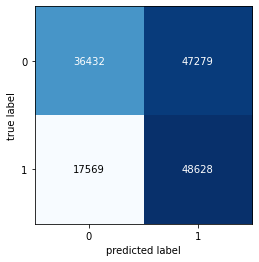

In [42]:
# Plotando novamente a 'Matriz de Confusão' referente aos resultados obtidos pelo modelo após o ajuste no valor de 'threshold'
cm = confusion_matrix(y_test, y_pred_thres)
plot_confusion_matrix(conf_mat=cm)
plt.show()

#### Modelo Naive-Bayes

In [43]:
# Instanciando o modelo 'LightGBM'
modelo = GaussianNB()

In [44]:
# Verificando parâmetros disponíveis para aplicar otimização
pprint(modelo.get_params())

{'priors': None, 'var_smoothing': 1e-09}


In [45]:
# Criando variável referente ao hiperparâmetro selecionado para otimização (lista com as tuplas do 'zip' referente aos valores de 'prior')
priors = list( zip([round(x, 2) for x in np.linspace(0.1, 0.9, 9)], [round(x, 2) for x in np.arange(0.9, 0, -0.1)]) )
priors.append(None)

# Armazenando variáveis em um dicionário
parametros_dic = {'priors': priors}

# Instanciando a classe 'RandomizedSearchCV' para pesquisar as configurações de parâmetros mais indicadas para melhoria do modelo
param_aleatorios = RandomizedSearchCV(estimator=modelo, param_distributions=parametros_dic, n_iter=100, n_jobs=-1, cv=3, verbose=2)

In [46]:
%%time
# Aplicando treino na instância da classe com os dados de treino do "dataset" para obter os valores de parâmetros mais indicados para o modelo
param_aleatorios.fit(X_train_norm, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Wall time: 7.28 s


RandomizedSearchCV(cv=3, estimator=GaussianNB(), n_iter=100, n_jobs=-1,
                   param_distributions={'priors': [(0.1, 0.9), (0.2, 0.8),
                                                   (0.3, 0.7), (0.4, 0.6),
                                                   (0.5, 0.5), (0.6, 0.4),
                                                   (0.7, 0.3), (0.8, 0.2),
                                                   (0.9, 0.1), None]},
                   verbose=2)

In [47]:
# Verificando se o modelo está propenso à 'underfitting' ou 'overfitting'
print(param_aleatorios.cv_results_['mean_test_score'], '\n')
print('Média das pontuações de "mean_test_score" do "cross-validation":', param_aleatorios.cv_results_['mean_test_score'].mean())
print('De acordo com os resultados, o modelo está aprendendo quando recebe novos dados, sem propensões para "underfitting" ou "overfitting".')

[0.47087631 0.54276353 0.60253186 0.61077409 0.61693503 0.62242985
 0.6242281  0.62133489 0.61940226 0.62069735] 

Média das pontuações de "mean_test_score" do "cross-validation": 0.5951973260241656
De acordo com os resultados, o modelo está aprendendo quando recebe novos dados, sem propensões para "underfitting" ou "overfitting".


In [48]:
# Visualizando os melhores parâmetros
param_aleatorios.best_params_

{'priors': (0.7, 0.3)}

In [49]:
# Instanciando novamente o modelo, dessa vez com os melhores parâmetros
mod_param_otim = GaussianNB(priors=(0.7, 0.3))

# Treinando o modelo
mod_param_otim.fit(X_train_norm, y_train)

# Realizando novamente as predições com o modelo, após o treino com os melhores parâmetros
y_pred = mod_param_otim.predict(X_test_norm)

In [50]:
# Exibindo métricas obtidas pelo modelo após as predições
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71     83711
           1       0.62      0.39      0.48     66197

    accuracy                           0.63    149908
   macro avg       0.62      0.60      0.59    149908
weighted avg       0.62      0.63      0.61    149908



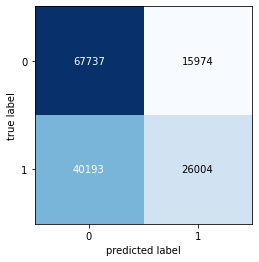

In [51]:
# Plotando 'Matriz de Confusão' referente aos resultados obtidos pelo modelo 
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm)
plt.show()

- Assim como no modelo "LightGBM", a métrica de "recall" precisa ser melhorada. Para isso, de maneira semelhante (aumentar os falsos positivos), será aplicado o ajuste no valor de "threshold" no modelo.

In [52]:
## Alteração do valor de 'threshold' no modelo ##

# Criando Série com as probabilidas previstas pelo modelo
y_proba_test = mod_param_otim.predict_proba(X_test_norm)

# Criando 'DataFrame' com os resultados reais e suas probabilidades preditas pelo modelo (threshold)
results_test = pd.DataFrame(y_test)
results_test['proba'] = np.round(y_proba_test[:,1], 3) # Pegando a probabilidade em estar com COVID (classe 1)
results_test.rename(columns={'covid_res': 'target'}, inplace = True)
results_test.head()

,target,proba
454891,0,0.156
76997,1,0.138
58826,1,0.182
353394,0,0.116
284045,0,0.095


In [53]:
# Criando variáveis que serão utilizadas como parâmetros no 'looping' referente aos resultados do modelo em cada 'threshold'
threshold_increment  = 0.02
threshold_begin = threshold_increment
threshold_end    = 1.0

# Criando listas para armazenar os resultados em cada 'looping', calculando TN, FN, FP, TP e outras métricas
lista_threshold  = []
lista_TN         = []
lista_FN         = []
lista_FP         = []
lista_TP         = []
lista_precision  = []
lista_recall     = []
lista_accuracy   = []
lista_f1score   = []

# 'Looping' para calcular e armazenar os resultados do modelo com cada valor de 'threshold' (incrementando a medida de 'threshold' em 0.2 a cada 'looping')
for i in np.arange(threshold_begin, threshold_end + threshold_increment, threshold_increment):
    i_threshold = np.round(i, 2)
    
    # Criando colunas de 'threshold' e 'flag' referente aos resultados dos testes, conforme percentual de 'threshold'
    results_test['y_pred'] = results_test['proba'].apply(lambda x: 1 if x >= i_threshold else 0)
    results_test['flag_TN'] = np.where((results_test['y_pred'] == 0) & (results_test['target'] == 0), 1, 0)
    results_test['flag_FN'] = np.where((results_test['y_pred'] == 0) & (results_test['target'] == 1), 1, 0)
    results_test['flag_TP'] = np.where((results_test['y_pred'] == 1) & (results_test['target'] == 1), 1, 0)
    results_test['flag_FP'] = np.where((results_test['y_pred'] == 1) & (results_test['target'] == 0), 1, 0)
    
    # Criando variáveis referente à soma dos resultados classificatórios para calcular as métricas
    TN = results_test['flag_TN'].sum()
    FN = results_test['flag_FN'].sum()
    TP = results_test['flag_TP'].sum()
    FP = results_test['flag_FP'].sum()
    
    # Realizando os cálculos das métricas
    precision = np.where((TP + FP) > 0, TP / (TP + FP), 0)
    recall = np.where((TP + FN) > 0, TP / (TP + FN), 0)
    accuracy = np.where((TN + FN + TP + FP) > 0, 
                         (TP + TN)/(TN + FN + TP + FP), 0)
    f1score = np.where((precision + recall) > 0, (2 * precision * recall)/(precision + recall), 0)
    
    # Armazenando resultados nas listas
    lista_threshold.append(i_threshold)
    lista_TN.append(TN)
    lista_FN.append(FN)
    lista_FP.append(FP)
    lista_TP.append(TP)
    lista_precision.append(np.round(precision, 4))
    lista_recall.append(np.round(recall, 4))
    lista_accuracy.append(np.round(accuracy, 4))
    lista_f1score.append(np.round(f1score, 4))

#---------------------------------------------------------------------------------------------------------------------------------
# Criando dicionário com os resultados finais das métricas de cada 'threshold'
dict_output = {
  "threshold" : lista_threshold, 
  "TN" : lista_TN,
  "FN" : lista_FN,
  "FP" : lista_FP,
  "TP" : lista_TP,
  "precision" : lista_precision,
  "recall" : lista_recall,
  "accuracy" : lista_accuracy,
  "f1_score" : lista_f1score
}

# Criando 'DataFrame' à partir do dicionário com os resultados finais
df_results = pd.DataFrame(dict_output)

In [54]:
# Exibindo os resultados dos valores de 'threshold'
df_results

,threshold,TN,FN,FP,TP,precision,recall,accuracy,f1_score
0,0.02,5269,2739,78442,63458,0.4472,0.9586,0.4585,0.6099
1,0.04,7875,3992,75836,62205,0.4506,0.9397,0.4675,0.6091
2,0.06,11118,5402,72593,60795,0.4558,0.9184,0.4797,0.6092
3,0.08,19317,9177,64394,57020,0.4696,0.8614,0.5092,0.6079
4,0.10,31625,15666,52086,50531,0.4924,0.7633,0.5480,0.5987
5,0.12,43818,22950,39893,43247,0.5202,0.6533,0.5808,0.5792
6,0.14,50662,27310,33049,38887,0.5406,0.5874,0.5974,0.5630
7,0.16,54420,30008,29291,36189,0.5527,0.5467,0.6044,0.5497
8,0.18,56353,31439,27358,34758,0.5596,0.5251,0.6078,0.5418
9,0.20,57515,32309,26196,33888,0.5640,0.5119,0.6097,0.5367


In [55]:
# Efetuando predições do modelo com o 'threshold' no valor de 0.36
y_pred_thres = np.where(y_proba_test[:,1] >= 0.10, 1, 0)

In [56]:
# Exibindo métricas obtidas pelo modelo após as predições
print(classification_report(y_test, y_pred_thres))

              precision    recall  f1-score   support

           0       0.67      0.39      0.49     83711
           1       0.49      0.76      0.60     66197

    accuracy                           0.55    149908
   macro avg       0.58      0.57      0.54    149908
weighted avg       0.59      0.55      0.54    149908



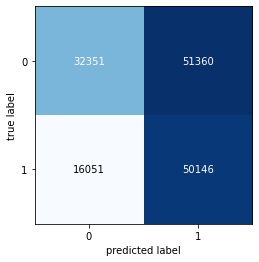

In [57]:
# Plotando 'Matriz de Confusão' referente aos resultados obtidos pelo modelo 
cm = confusion_matrix(y_test, y_pred_thres)
plot_confusion_matrix(conf_mat=cm)
plt.show()

#### Comparação entre os Modelos e escolha do melhor para o projeto

Resultados:
- Precisão: LightGBM **0.51** x 0.49 Naive-Bayes
- "Recall": LightGBM 0.73 x **0.76** Naive-Bayes
- "F1-Score": LightGBM 0.60 x 0.60 Naive-Bayes
- Acurácia: LightGBM **0.56** x 0.55 Naive-Bayes  

Ao comparar os resultados de ambos os modelos, após a realização das otimizações apresentadas no projeto, o modelo **LightGBM** foi selecionado, devido aos resultados mais equilibrados (boa pontuação de "recall" e mais de 0.50 na precisão), melhores métricas (precisão e acurácia) do mesmo em relação ao Naive-Bayes e um valor de "threshold" menos distante do "default" (0.50) para ele em relação ao outro modelo (0.36 contra 0.10). Outras métricas que reforçam a escolha do modelo: média de "test_score" do "cross-validation" (**0,63** x 0,59) e a própria pontuação de curva ROC-AUC apresentada anteriormente (**0,6061** x 0,6025), características que demonstram que o modelo selecionado possui maior capacidade de aprendizado.

---

## Conclusões sobre o Projeto

O conjunto de dados apresentado para o projeto foi desafiador, pois não haviam muitas correlações e quase todas suas "features" são categóricas, dificultando a EDA mediante visualização gráfica (criação de diferentes tipos de gráficos). Para desenvolver o mesmo, foi necessário avaliar algumas "features" com grandes quantidades de dados faltantes e tomar decisões com base no objetivo do modelo, neste caso, de prever os casos de Covid ou ainda, no percentual de dados faltantes nas mesmas. Seguindo esse racional, foram removidas "features" que não correspondiam a um diagnóstico antecipado da doença e uma espcificamente (contact_other_covid) apenas pelo grande percentual de dados faltantes (em torno de 70%).  

Outras features foram possíveis os preenchimentos dos seus dados faltantes, porque o percentual desses faltantes eram pouco relevantes em relação ao todo e uma específica (pregnancy), mesmo os dados faltantes sendo maioria, foi possível efetuar o preenchimento, pois existe uma correlação 100% direta entre ela e o sexo masculino (valor 0), facilitando o procedimento de alteração desses valores.  

Na etapa de EDA, as melhores análises obtidas aconteceram com a utilização única "feature" contínua e com demonstrações gráficas de contagens dos dados referentes às demais. Também resultaram bons "insights" avaliar cada "feature" individualmente em relação à "target", descobrindo características que coincidem ou proporcionam poteciais pacientes com teste positivo (exemplo: pessoas com pneumonia e acima dos 40 anos, etc). Também pode-se observar com as visualizações gráficas dos dados que a quantidade de pessoas com teste positivo aumenta em relação aquelas com negativo conforme a faixa etária avança, além disso, nota-se que os casos de testes negativos e positivos concentram-se em diferentes faixas de idade.  

Levando em consideração todo o conteúdo descrito acima, o desenvolvimento do modelo ocorreu com a utilização de todas as "features" disponíveis à partir do EDA. Para efetuar a primeira seleção dos melhores modelos (no caso deste projeto, foram selecionados dois), foi aplicada uma função para calcular as principais métricas e visualização gráfica da curva ROC-AUC de 6 modelos com os valores "default" de seus hiperparâmetros.  

Após a seleção dos modelos e aplicadas algumas otimizações, o resultado obtido não foi satisfatório em relação aos testes positivos de Covid. Sendo necessária a melhora para ambos, a etapa seguinte foi analisar diferentes valores de "threshold", com o objetivo de aumentar a quantidade de testes "Falso Positivo" e diminuir a quantidade de "Falsos Negativos". Ao mesmo tempo, não podendo perder muito em precisão e acuracidade (um pouco seria necessário pensando em melhoria no resultado de TP), aplicou-se um determinado valor de "threshold" em ambos, obtendo uma melhora expressiva nos falsos positivos, oferecendo um modelo mais eficiente pensando em um modelo focado em diagnósticos de uma determinada doença (neste caso Covid).  

Depois de todas as análises e todos os resultados obtidos, foi constatado que o melhor modelo, dentre os escolhidos para esse projeto é o '**LightGBM**'. ele oferece melhores métricas e resultados que o tornam um modelo mais eficaz para a proposta feita neste projeto. 